# Supercritical water oxidation (SCWO)

In [1]:
import PFAS_SAT as ps
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd
pd.set_option('display.max_colwidth', 0)

## Model document

SCWO systems use supercritical water (i.e., water above 373.946 C and 22.064 MPa) to facilitate the oxidation of PFAS or other hazardous substances in aqueous streams. SCWO systems are already in operation in Japan and Korea to manage PCBs and halogenated wastes, and the Chematur Engineering facility in the UK uses SCWO to recover metals from catalysts. Research into the use the SCWO for PFAS destruction is ongoing, and there are several different systems being developed. SCWO produces steam, water, and slurry outputs. The mineralized fluoride remains in the slurry. The destruction of PFAS is modeled using a destruction and removal efficiency (DRE). Any PFAS that is not destroyed or removed remains in the water. There may also be small amounts of PFAS volatilized in the steam and remaining in the slurry. The process model estimates the fraction of incoming water that goes to each stream, and the PFAS remaining in each. 

<img src="../Images/ProcessModels/SCWO.png" alt="Drawing" style="width: 700px;"/>


### Assumptions and Limitations:

1.	It assumes that the destruction and removal efficiency remains constant for each PFAS.
2.	By default, the model assumes that all the remaining PFAS is in the water stream. However, this is a user input, and the user can send PFAS to the steam or slurry streams as well. 


## Input Parameters for SCWO model

In [2]:
SCWO = ps.SCWO()
SCWO.InputData.Data[['Category','Dictonary_Name','Parameter Name', 'Parameter Description', 'amount', 'unit','Reference']]

,Category,Dictonary_Name,Parameter Name,Parameter Description,amount,unit,Reference
0,Total destruction and removal efficiency,DRE,PFOA,DRE of PFOA,0.99260,fraction,NaN
1,Total destruction and removal efficiency,DRE,PFOS,DRE of PFOS,0.99997,fraction,NaN
2,Total destruction and removal efficiency,DRE,PFBA,DRE of PFBA,0.95043,fraction,NaN
3,Total destruction and removal efficiency,DRE,PFPeA,DRE of PFPeA,0.94257,fraction,NaN
4,Total destruction and removal efficiency,DRE,PFHxA,DRE of PFHxA,0.99843,fraction,NaN
5,Total destruction and removal efficiency,DRE,PFHpA,DRE of PFHpA,0.96303,fraction,NaN
6,Total destruction and removal efficiency,DRE,PFNA,DRE of PFNA,0.99260,fraction,NaN
7,Total destruction and removal efficiency,DRE,PFDA,DRE of PFDA,0.99970,fraction,NaN
8,Total destruction and removal efficiency,DRE,PFBS,DRE of PFBS,0.99950,fraction,NaN
9,Total destruction and removal efficiency,DRE,PFHxS,DRE of PFHxS,0.99993,fraction,NaN


## Incoming Contaminated Water to SCWO

In [3]:
IncominWaste = ps.IncomFlow()
IncominWaste.set_flow('ContaminatedWater', 1000)
IncominWaste.calc()
ContaminatedWater = IncominWaste.Inc_flow
ContaminatedWater.report()

,Parameter,Unit,Amount
0,Mass flow,kg,1000
1,Solids flow,kg,5
2,Moisture flow,kg,995
3,Volume flow,L,1000
4,Carbon flow,kg,2.5
5,PFOA,μg,100000
6,PFOS,μg,100000
7,PFBA,μg,100000
8,PFPeA,μg,100000
9,PFHxA,μg,100000


## PFAS balance in SCWO

In [4]:
SCWO.calc(Inc_flow=ContaminatedWater)
SCWO.report(normalized=True)

,Effluent,Slurry,Steam,Destroyed
PFOA,0.74,0.0,0.0,99.26
PFOS,0.00,0.0,0.0,100.00
PFBA,4.96,0.0,0.0,95.04
PFPeA,5.74,0.0,0.0,94.26
PFHxA,0.16,0.0,0.0,99.84
PFHpA,3.70,0.0,0.0,96.30
PFNA,0.74,0.0,0.0,99.26
PFDA,0.03,0.0,0.0,99.97
PFBS,0.05,0.0,0.0,99.95
PFHxS,0.01,0.0,0.0,99.99


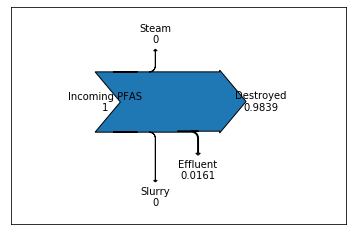

In [5]:
SCWO.plot_sankey()

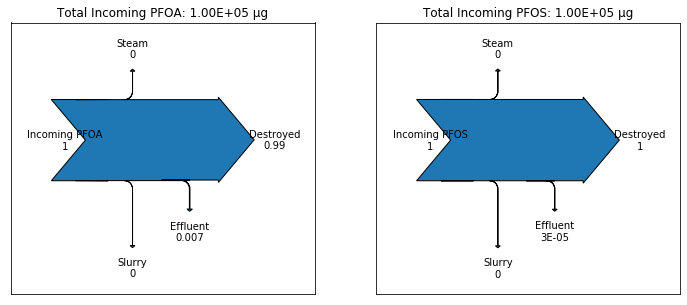

In [6]:
SCWO.plot_sankey_report(margin=.5)